In [1]:
#compare.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#compare evolution of self-confining ringlet to circular ringlet

In [2]:
#this helper computes area vs time
def ringlet_area(a, e):
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = a.shape
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    a_inner = a[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_inner = e[:, 0, :].mean(axis=1)
    area_outer = np.pi*(a_outer**2)*np.sqrt(1.0 - e_outer**2)
    area_inner = np.pi*(a_inner**2)*np.sqrt(1.0 - e_inner**2)
    area = area_outer - area_inner
    return area

In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [4]:
#restore eccentric ring evolution
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output('output')
a_ecc, e_ecc, wt_ecc, M_ecc = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*shear_viscosity)
print 'viscous_timescale = ', viscous_timescale
times_viscous_ecc = times/viscous_timescale
#compute eccentric ringlet's area vs time
area_ecc = ringlet_area(a_ecc, e_ecc)

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  3e-13
bulk_viscosity =  3e-13
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.005, 'e_prime': 0.0}
viscous_timescale =  69444.4444444


In [5]:
#restore circular ring evolution
execfile('circular/inputs.py')
r, t, vr, vt, times, lambda0 = restore_output('circular/output')
a_circ, e_circ, wt_circ, M_circ = coords2elem(J2, Rp, r, t, vr, vt)
viscous_timescale = (radial_width**2)/(12*shear_viscosity)
times_viscous_circ = times/viscous_timescale
area_circ = ringlet_area(a_circ, e_circ)
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'this should be zero = ', np.abs(times_viscous_circ - times_viscous_ecc).sum()

shear_viscosity =  3e-13
bulk_viscosity =  3e-13
this should be zero =  0.0


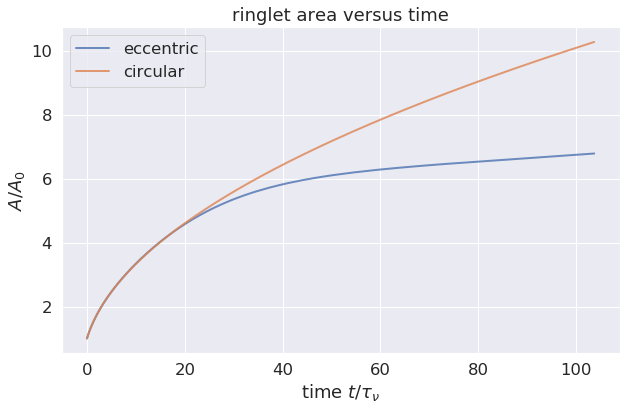

In [6]:
#plot ringlet area vs time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous_ecc
y = area_ecc/area_ecc[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='eccentric')
x = times_viscous_circ
y = area_circ/area_circ[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='circular')
p = ax.set_title('ringlet area versus time')
p = ax.set_ylabel(r'$A/A_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

In [7]:
#compute ringlet spreading rates
dAdt_ecc = np.gradient(area_ecc, times)
dAdt_circ = np.gradient(area_circ, times)

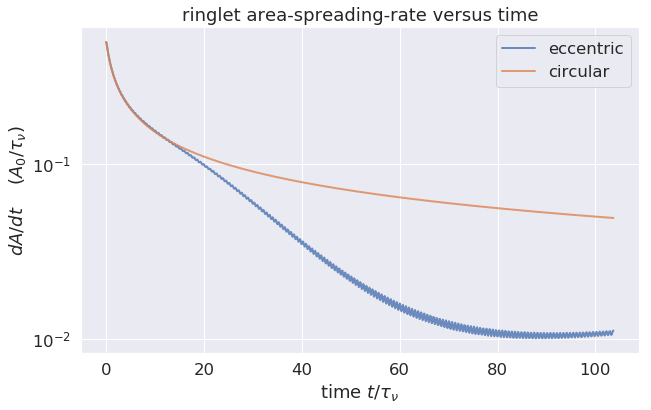

In [8]:
#plot ringlet spreading rates
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous_ecc
factor = area_ecc[0]/viscous_timescale
y = dAdt_ecc/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='eccentric')
x = times_viscous_circ
factor = area_circ[0]/viscous_timescale
y = dAdt_circ/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='circular')
p = ax.set_title('ringlet area-spreading-rate versus time')
p = ax.set_ylabel(r'$dA/dt$    $(A_0/\tau_\nu)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_yscale('log')
p = ax.legend()

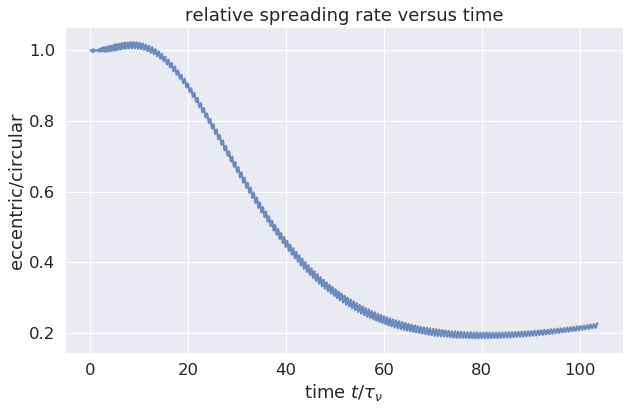

In [9]:
#plot relative spreading rates
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous_ecc
y = dAdt_ecc/dAdt_circ
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8)
p = ax.set_title('relative spreading rate versus time')
p = ax.set_ylabel('eccentric/circular')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

In [10]:
#this helper computes delta_a vs time
def ringlet_delta_a(a, e):
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = a.shape
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    a_inner = a[:, 0, :].mean(axis=1)
    delta_a = a_outer - a_inner
    return delta_a

In [11]:
#compute rates at which ringlet's delta_a evolves
da_ecc = ringlet_delta_a(a_ecc, e_ecc)
da_circ = ringlet_delta_a(a_circ, e_circ)
ddadt_ecc = np.gradient(da_ecc, times)
ddadt_circ = np.gradient(da_circ, times)

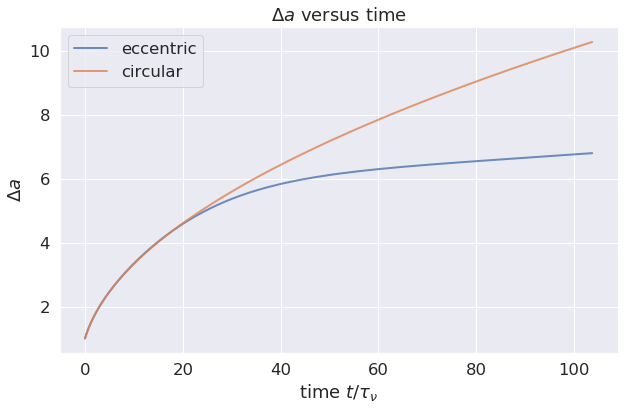

In [12]:
#plot delta_avs time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous_ecc
y = da_ecc/da_ecc[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='eccentric')
x = times_viscous_circ
y = da_circ/da_circ[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='circular')
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_ylabel(r'$\Delta a$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

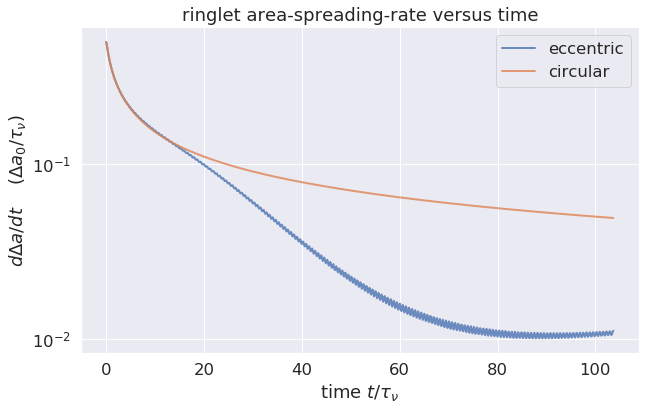

In [13]:
#plot ringlet spreading rates
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous_ecc
factor = da_ecc[0]/viscous_timescale
y = ddadt_ecc/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='eccentric')
x = times_viscous_circ
factor = da_circ[0]/viscous_timescale
y = ddadt_circ/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='circular')
p = ax.set_title('ringlet area-spreading-rate versus time')
p = ax.set_ylabel(r'$d\Delta a/dt$    $(\Delta a_0/\tau_\nu)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_yscale('log')
p = ax.legend()

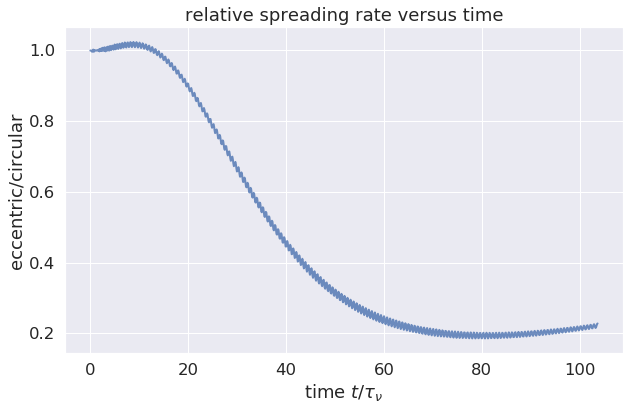

In [14]:
#plot relative spreading rates
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous_ecc
y = ddadt_ecc/ddadt_circ
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8)
p = ax.set_title('relative spreading rate versus time')
p = ax.set_ylabel('eccentric/circular')
p = ax.set_xlabel(r'time $t/\tau_\nu$')